In [101]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [102]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [103]:

path = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/sensitivity_analysis/data/sensitivity_analysis_results/wacc' # use your path
all_files = glob.glob(path + "/*.csv")

list_df = []
for i, file in enumerate(all_files):
    wacc = file.split("/")[-1].split("_")[-1].split(".")[0]
    tmp = pd.read_csv(file)
    tmp['id'] = i
    tmp['wacc'] = wacc
    list_df.append(tmp)
    
wacc_results = pd.concat(list_df)
wacc_results

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,id,wacc
0,0,331706.70,208285.87,23300.555309,29579.745224,3154.551065,165604.866874,9894.00,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.287499e+10,89.480547,1171.156470,0,39
1,1,229417.56,198973.35,23464.752699,29595.668288,3122.286319,165604.866874,1884.71,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,7.693168e+09,56.141588,919.171781,0,39
2,2,359908.38,183517.00,21601.843042,29224.130128,1658.945670,165604.866874,13047.47,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.764287e+10,91.742926,1179.585427,0,39
3,3,335853.72,233504.25,23278.203832,29656.706700,3188.160175,165604.866874,12933.01,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,3.470273e+10,107.855012,1242.987733,0,39
4,4,130694.58,150475.25,22184.551132,29595.668288,3116.600720,147569.693113,0.00,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,2.211915e+10,42.877584,601.080169,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,111822.48,107280.97,44004.863578,24796.837395,536092.871950,200652.825626,0.00,0,14788.0,14475.0,20856.2,6979.5,320977.8,15961.0,0.0,306.35572,-1.748616e+12,74.426965,466.386176,89,44
132,132,39949.86,27990.49,40939.785807,22966.259481,333933.146099,161511.626186,0.00,0,14788.0,14475.0,20856.2,6979.5,320977.8,15961.0,0.0,306.35572,-1.763326e+12,41.273703,143.556139,89,44
133,133,107048.28,97204.46,46799.653496,25857.592660,506316.999132,211415.549789,0.00,0,14788.0,14475.0,20856.2,6979.5,320977.8,15961.0,0.0,306.35572,-1.762510e+12,69.441102,434.209846,89,44
134,134,43821.90,12513.60,45001.110187,24078.748279,332495.243889,146665.981050,0.00,0,14788.0,14475.0,20856.2,6979.5,320977.8,15961.0,0.0,306.35572,-1.787564e+12,36.069087,116.881279,89,44


In [104]:
def get_mix(df):
#     df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['actual'] / df['actual'].sum()
    return df


def get_projection_difference_sum(results_df, year_to_compare=None):
    ROOT_DIR = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run'
    
    contributed_results = results_df.filter(regex='contributed_|Carbon_emitted')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24
#     print(contributed_results)
    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
#     print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', "carbon", 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split

#     results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
#     results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
#     results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
#     results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
#                                              axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

    if year_to_compare is not None:
        # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
        results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])

    joined = results_wa_long.rename(columns={'value': 'actual'})
    joined = joined.groupby("year").apply(get_mix)
    joined = joined.reset_index()
    return joined

In [105]:
# per_year_dat = get_projection_difference_sum(scenario)

# per_year_long = per_year_dat.melt(['year','fuel_type'])
# per_year_long

wacc_long = wacc_results.groupby("id").apply(lambda x: get_projection_difference_sum(x)).reset_index()
wacc_long = pd.merge(wacc_long, wacc_results[['id', 'wacc']], on="id")
wacc_long

,id,level_1,year,fuel_type,actual,simulated_perc,wacc
0,0,0,2018,ccgt,10126.822404,0.383001,39
1,0,0,2018,ccgt,10126.822404,0.383001,39
2,0,0,2018,ccgt,10126.822404,0.383001,39
3,0,0,2018,ccgt,10126.822404,0.383001,39
4,0,0,2018,ccgt,10126.822404,0.383001,39
...,...,...,...,...,...,...,...
1872715,89,152,2034,carbon,11.130135,0.000337,44
1872716,89,152,2034,carbon,11.130135,0.000337,44
1872717,89,152,2034,carbon,11.130135,0.000337,44
1872718,89,152,2034,carbon,11.130135,0.000337,44


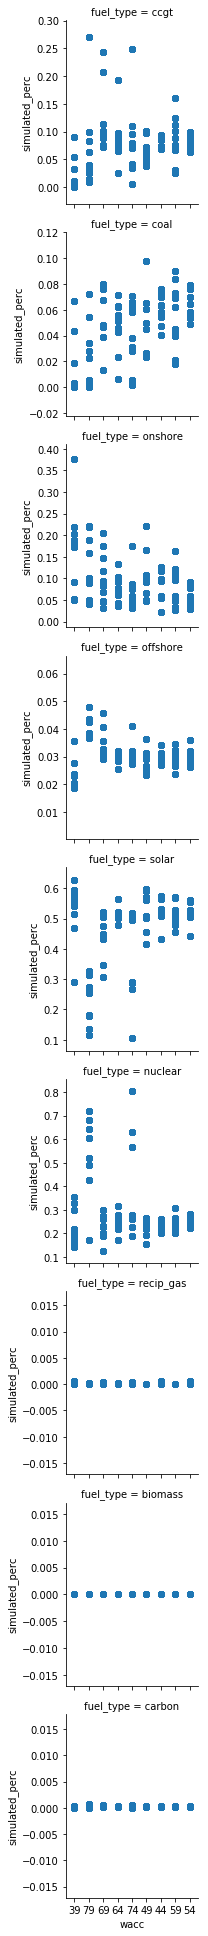

In [106]:
# sns.scatterplot(data=wacc_long[wacc_long.year==2034], x='wacc', y="actual", hue="fuel_type")

g = sns.FacetGrid(wacc_long[wacc_long.year==2034], row="fuel_type", sharey=False)
g = g.map(plt.scatter, 'wacc', 'simulated_perc')

In [107]:
wacc_long.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/sensitivity_analysis/data/processed/wacc_sensitivity_data.csv")

# Investments

In [119]:
path = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/sensitibity_analysis/data/sensitivity_analysis_results/' # use your path
all_files = glob.glob(path + "/*.csv")

list_df = []
for i, file in enumerate(all_files):
    downpayment = file.split("/")[-1].split("_")[-1].split(".")[0]
    if len(downpayment) == 2:
        downpayment = str(float(downpayment)/10)
        
    tmp = pd.read_csv(file)
    tmp['id'] = i
    tmp['downpayment'] = downpayment
    list_df.append(tmp)
    
downpayment_results = pd.concat(list_df)
downpayment_results

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,id,downpayment
0,0,343296.60,201317.28,23300.555309,29579.745224,3154.551065,165604.866874,10627.32,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.278004e+10,89.822950,1180.622909,0,1
1,1,203234.94,223705.09,23464.752699,29595.668288,3122.286319,165604.866874,1884.71,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,6.627154e+09,54.517060,919.264659,0,1
2,2,336012.84,203026.84,21601.843042,29224.130128,1658.945670,165604.866874,11562.40,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.491695e+10,89.712243,1171.644217,0,1
3,3,346512.00,220910.07,23278.203832,29656.706700,3188.160175,165604.866874,13047.47,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,3.169120e+10,109.545879,1236.753767,0,1
4,4,139737.84,143472.69,22184.551132,29595.668288,3116.600720,147569.693113,0.00,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.735343e+10,43.283473,603.812489,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,78532.56,98869.29,26479.097326,25092.082917,516218.775700,356540.945023,0.00,0,13705.0,14475.0,13096.2,6979.5,201345.8,25861.0,0.0,306.35572,-3.226251e+12,65.650276,380.037833,34,1.5
132,132,10173.66,0.00,22031.295342,21065.412423,434540.848615,293808.880294,0.00,0,13705.0,14475.0,13096.2,6979.5,201345.8,25861.0,0.0,306.35572,-3.251780e+12,21.060815,20.652530,34,1.5
133,133,78292.86,81803.41,28056.466124,25702.212228,513595.938925,369455.329471,0.00,0,13705.0,14475.0,13096.2,6979.5,201345.8,25861.0,0.0,306.35572,-3.267099e+12,58.804425,341.470471,34,1.5
134,134,18103.08,1549.19,22322.199506,21757.466181,442544.189780,281807.790499,0.00,0,13705.0,14475.0,13096.2,6979.5,201345.8,25861.0,0.0,306.35572,-3.303180e+12,25.218288,40.206112,34,1.5


In [120]:
downpayment_long = downpayment_results.groupby("id").apply(lambda x: get_projection_difference_sum(x)).reset_index()
downpayment_long = pd.merge(downpayment_long, downpayment_results[['id', 'downpayment']], on="id")
downpayment_long

,id,level_1,year,fuel_type,actual,simulated_perc,downpayment
0,0,0,2018,ccgt,10451.054466,0.395690,1
1,0,0,2018,ccgt,10451.054466,0.395690,1
2,0,0,2018,ccgt,10451.054466,0.395690,1
3,0,0,2018,ccgt,10451.054466,0.395690,1
4,0,0,2018,ccgt,10451.054466,0.395690,1
...,...,...,...,...,...,...,...
728275,34,152,2034,carbon,7.300546,0.000188,1.5
728276,34,152,2034,carbon,7.300546,0.000188,1.5
728277,34,152,2034,carbon,7.300546,0.000188,1.5
728278,34,152,2034,carbon,7.300546,0.000188,1.5


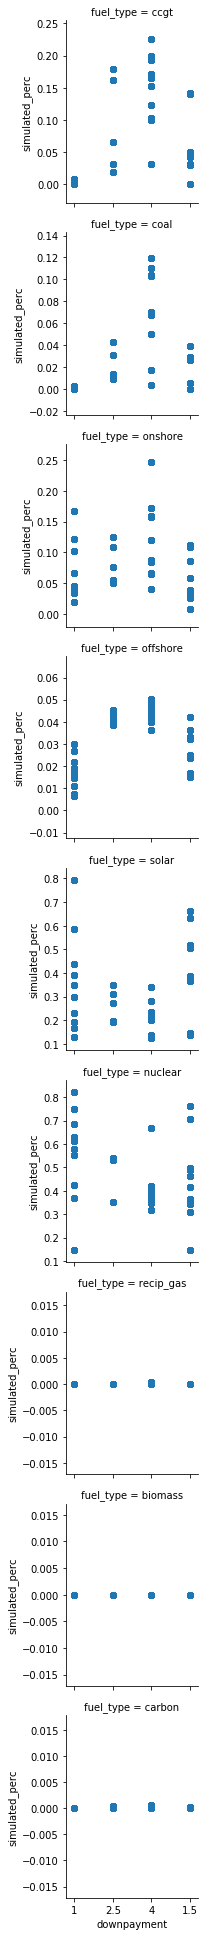

In [121]:

g = sns.FacetGrid(downpayment_long[downpayment_long.year==2034], row="fuel_type", sharey=False)
g = g.map(plt.scatter, 'downpayment', 'simulated_perc')

In [122]:
downpayment_long.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/sensitivity_analysis/data/processed/downpayment_sensitivity_data.csv")